In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/Lipscomb/ucsdShots.csv").reset_index()
data.dropna(inplace=True)

In [3]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,Lipscomb,0.0,Set Piece,Successful,"[64.66666666666666, 7.80952380952381]","[117.04761904761904, 8.0]",UCSD,55.333333,72.190476,2.952381,72.000000,right
1,3,Lipscomb,0.0,Pass,Successful,"[117.8095238095238, 8.57142857142857]","[111.7142857142857, 44.76190476190476]",UCSD,2.190476,71.428571,8.285714,35.238095,right
2,5,Lipscomb,0.0,Shot(foot),Unsuccessful,"[110.38095238095238, 44.0]","[118.95238095238093, 43.04761904761905]",UCSD,9.619048,36.000000,1.047619,36.952381,right
3,7,Lipscomb,1.0,Tackle,Successful,"[72.85714285714283, 18.095238095238102]","[-1, -1]",UCSD,47.142857,61.904762,121.000000,81.000000,right
4,9,Lipscomb,1.0,Pass,Successful,"[84.47619047619045, 17.714285714285722]","[83.52380952380952, 6.666666666666671]",UCSD,35.523810,62.285714,36.476190,73.333333,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,99,Lipscomb,13.0,Pass,Unsuccessful,"[112.85714285714286, 45.904761904761905]","[22.761904761904752, 22.095238095238102]",UCSD,112.857143,45.904762,22.761905,22.095238,left
57,100,Lipscomb,13.0,Tackle,Successful,"[23.7142857142857, 23.23809523809524]","[19.14285714285713, 17.714285714285722]",Lipscomb,23.714286,23.238095,19.142857,17.714286,left
58,101,Lipscomb,13.0,Shot(foot),Unsuccessful,"[21.619047619047606, 16.38095238095238]","[14.190476190476183, 22.66666666666667]",UCSD,21.619048,16.380952,14.190476,22.666667,left
59,102,Lipscomb,14.0,Set Piece,Unsuccessful,"[28.09523809523808, 51.23809523809524]","[1.0476190476190368, 42.85714285714286]",UCSD,28.095238,51.238095,1.047619,42.857143,left


Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

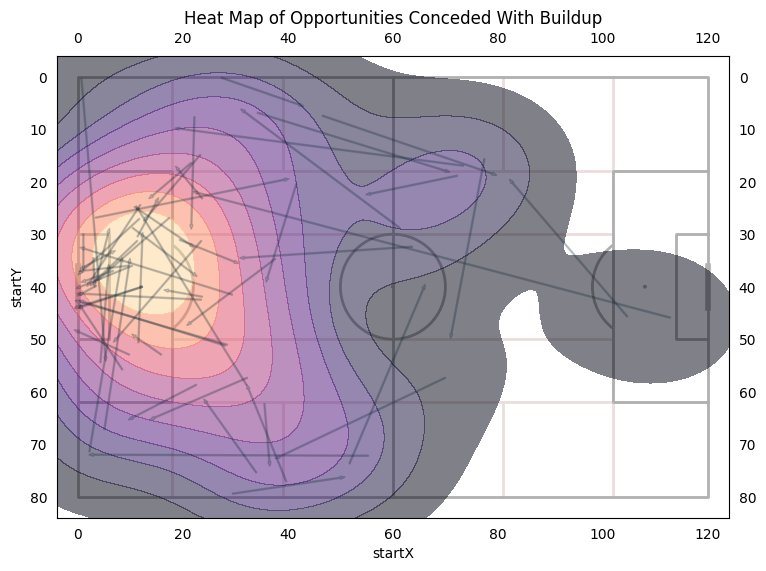

In [4]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [5]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [6]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,Lipscomb,0.0,Set Piece,Successful,"[64.66666666666666, 7.80952380952381]","[117.04761904761904, 8.0]",UCSD,55.333333,72.190476,2.952381,72.000000,right
3,7,Lipscomb,1.0,Tackle,Successful,"[72.85714285714283, 18.095238095238102]","[-1, -1]",UCSD,47.142857,61.904762,121.000000,81.000000,right
8,16,Lipscomb,2.0,Throw-in,Successful,"[92.66666666666666, 79.80952380952381]","[77.8095238095238, 74.66666666666666]",UCSD,27.333333,0.190476,42.190476,5.333333,right
17,34,Lipscomb,3.0,Pass,Unsuccessful,"[97.8095238095238, 72.38095238095238]","[98.38095238095238, 51.80952380952381]",Lipscomb,22.190476,7.619048,21.619048,28.190476,right
21,41,Lipscomb,4.0,Set Piece,Successful,"[119.33333333333331, 79.61904761904762]","[114.76190476190476, 26.66666666666667]",UCSD,0.666667,0.380952,5.238095,53.333333,right
24,47,Lipscomb,5.0,Throw-in,Successful,"[90.57142857142856, 0.5714285714285694]","[69.99999999999997, 3.6190476190476204]",UCSD,29.428571,79.428571,50.000000,76.380952,right
31,61,Lipscomb,6.0,Set Piece,Successful,"[87.9047619047619, 21.33333333333333]","[108.47619047619045, 54.666666666666664]",UCSD,32.095238,58.666667,11.523810,25.333333,right
35,69,Lipscomb,7.0,Set Piece,Unsuccessful,"[107.7142857142857, 40.0]","[119.14285714285714, 36.19047619047619]",UCSD,12.285714,40.000000,0.857143,43.809524,right
37,73,Lipscomb,8.0,Tackle,Successful,"[37.61904761904761, 34.66666666666667]","[21.428571428571416, 46.85714285714286]",UCSD,37.619048,34.666667,21.428571,46.857143,left
39,77,Lipscomb,9.0,Tackle,Successful,"[10.380952380952372, 28.76190476190476]","[21.999999999999986, 37.523809523809526]",Lipscomb,10.380952,28.761905,22.000000,37.523810,left


Text(0.5, 1.0, 'UCSD Shots Origin')

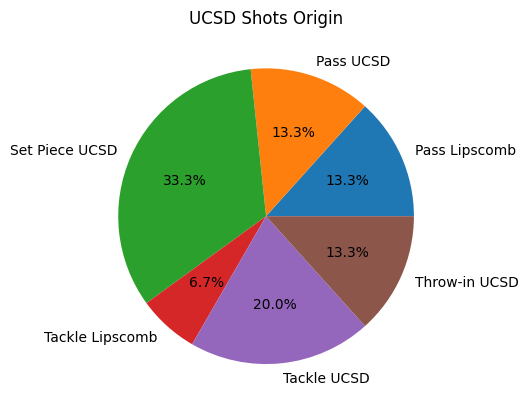

In [15]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("UCSD Shots Origin")

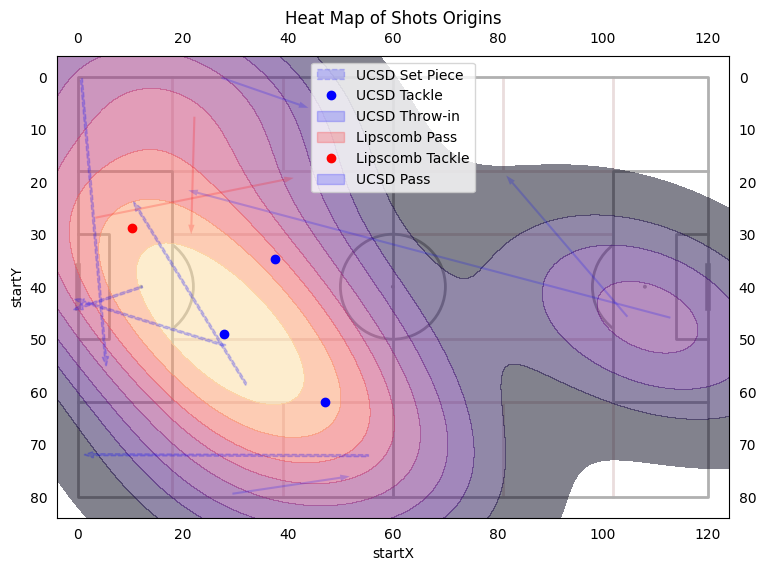

In [18]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if row.get("Event")=="Set Piece":
         linestyle = '--'
    else:
         linestyle = ''
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"),linestyle = linestyle)
plt.title("Heat Map of Shots Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


17

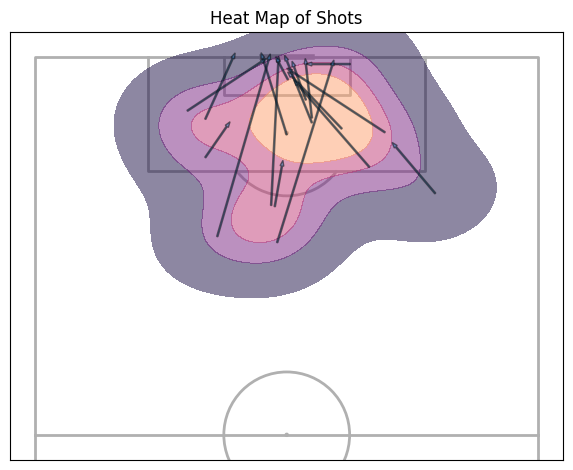

In [27]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Shots")
shots.shape[0]

In [20]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists = shotAssists[shotAssists.get("Event")!="Set Piece"]
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
0,0.0,Lipscomb,UCSD,Pass,Successful,2.190476,71.428571,8.285714,35.238095,Unsuccessful
1,1.0,Lipscomb,UCSD,Pass,Successful,32.285714,57.333333,14.571429,64.952381,Unsuccessful
2,2.0,Lipscomb,UCSD,Pass,Successful,34.000000,75.428571,24.476190,62.095238,Unsuccessful
3,2.0,Lipscomb,Lipscomb,Tackle,Successful,11.333333,30.476190,14.952381,23.809524,Unsuccessful
4,3.0,Lipscomb,Lipscomb,Pass,Unsuccessful,22.190476,7.619048,21.619048,28.190476,Unsuccessful
5,3.0,Lipscomb,Lipscomb,Save,Successful,3.333333,39.238095,5.809524,29.714286,Unsuccessful
6,4.0,Lipscomb,UCSD,Pass,Successful,4.285714,54.476190,5.809524,36.571429,Unsuccessful
7,5.0,Lipscomb,UCSD,Pass,Successful,63.714286,32.380952,31.714286,34.476190,Unsuccessful
8,6.0,Lipscomb,UCSD,Pass,Successful,23.523810,31.238095,7.333333,49.904762,Unsuccessful
10,8.0,Lipscomb,UCSD,Tackle,Successful,37.619048,34.666667,21.428571,46.857143,Unsuccessful


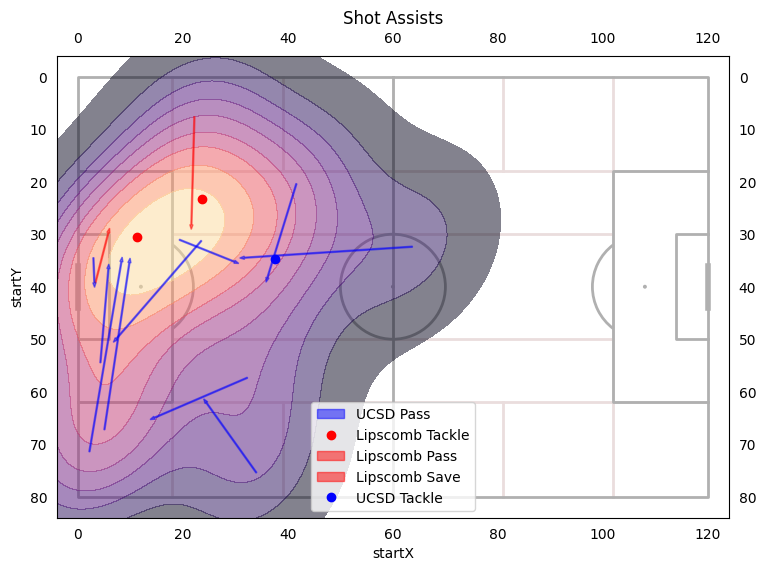

In [21]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

,Event,Team,numOpportunity,Game,Event Result,startX,startY,endX,endY,Shot result
0,Pass,Lipscomb,1,1,1,1,1,1,1,1
1,Pass,UCSD,10,10,10,10,10,10,10,10
2,Save,Lipscomb,1,1,1,1,1,1,1,1
3,Tackle,Lipscomb,2,2,2,2,2,2,2,2
4,Tackle,UCSD,1,1,1,1,1,1,1,1


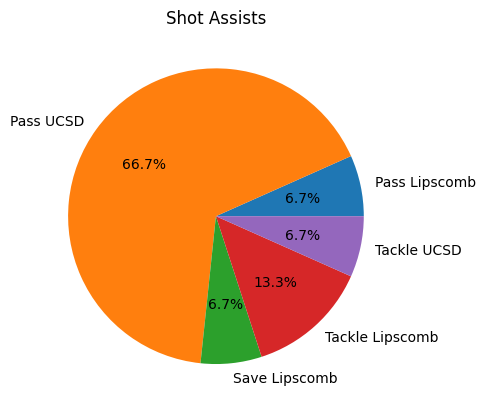

In [26]:
counts = shotAssists.groupby(["Event","Team"]).count().reset_index()
labels = counts.get("Event")+" "+counts.get("Team")
plt.pie(counts.get("Game"),labels=labels,autopct='%1.1f%%')
plt.title("Shot Assists")
counts